In [2]:
from astropy.io import fits
import numpy as np
import fitsio
from astropy.table import Table,vstack,join,Column
from scipy.ndimage.filters import gaussian_filter1d
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns
 
sns.set_style("white")

In [3]:
plt.rc("font", **{"family": "serif", "serif": ["Computer Modern"]})
plt.rc("text", usetex=True)

g_fontsize_legend = 25
g_fontsize_xlabel = 22
g_fontsize_ylabel = 22
g_fontsize_xyticklabels = 22

g_ylabel_flux = "Flux [10$^{-17}$ erg s$^{-1}$ cm$^{-2}$ $\AA^{-1}$]"
g_xlabel = "$\lambda$ [$\AA$]"

In [4]:
# Data from https://people.ast.cam.ac.uk/~rfc/atomdat.html & Harris et al. 2016
l_lya = 1215.67
l_nv = 1238.82
l_siv = 1393.76
l_civ = 1548.21
l_mgii = 2803

bal_tr = 'truth-16-1187_bal.fits'
bal_rr = 'rr_zbest-16-1187.fits'
mas_rr = 'rr_zbest-16-1187_mod.fits'
bal_sp = 'spectra-16-1187_bal.fits'
mas_sp = 'spectra-16-1187_mod.fits'

In [5]:
bal_tr1 = Table.read(bal_tr, hdu = 1)
bal_tr3 = Table.read(bal_tr, hdu = 3)
bal_rr = Table.read(bal_rr, hdu = 1)
mas_rr = Table.read(mas_rr, hdu = 1)
bal_tr1.sort('TARGETID')
bal_rr.sort('TARGETID')
mas_rr.sort('TARGETID')

z_tr_b = bal_tr1['TRUEZ']
z_rr_b = bal_rr['Z']
z_rr_m = mas_rr['Z']

print(len(z_tr_b))

AI_CIV = bal_tr3['AI_CIV']

zwarn_bal = bal_rr['ZWARN']
spec_bal = bal_rr['SPECTYPE']
zwarn_mas = mas_rr['ZWARN']
spec_mas = mas_rr['SPECTYPE']

waveb_bal = fitsio.read(bal_sp,ext=2)
waver_bal = fitsio.read(bal_sp,ext=7)
fluxb_bal = fitsio.read(bal_sp,ext=3)
fluxr_bal = fitsio.read(bal_sp,ext=8)
waveb_mas = fitsio.read(mas_sp,ext=2)
waver_mas = fitsio.read(mas_sp,ext=7)
fluxb_mas = fitsio.read(mas_sp,ext=3)
fluxr_mas = fitsio.read(mas_sp,ext=8)

896


In [5]:
print('BAL')
print('Stars')
idx_spec_star_mas = [index for index,value in enumerate(spec_mas) if value == 'STAR']
print(idx_spec_star_mas)
print('Galaxies')
idx_spec_gal_mas = [index for index,value in enumerate(spec_mas) if value == 'GALAXY']
print(idx_spec_gal_mas)
print('  ')
print('masked BAL')
print('Stars')
idx_spec_star_mas = [index for index,value in enumerate(spec_mas) if value == 'STAR']
print(idx_spec_star_mas)
print('Galaxies')
idx_spec_gal_mas = [index for index,value in enumerate(spec_mas) if value == 'GALAXY']
print(idx_spec_gal_mas)

BAL
Stars
[]
Galaxies
[435, 491, 552, 752]
  
masked BAL
Stars
[]
Galaxies
[435, 491, 552, 752]


In [6]:
print(np.min(AI_CIV), np.max(AI_CIV), np.mean(AI_CIV))
print(len(AI_CIV))
ind = np.where(AI_CIV > 0.0)
AI_mod = AI_CIV[ind]
print(len(AI_mod))

ind_1 = np.logical_and(AI_mod > 200.0,AI_mod < 300.0)
ind_2 = np.logical_and(AI_mod > 4100.0,AI_mod < 4200.0)
ind_3 = np.where(AI_mod > 7000.0)

print(AI_mod[ind_1])
print(AI_mod[ind_2])
print(AI_mod[ind_3])

print(np.where(AI_mod == 214.46658))
print(np.where(AI_mod == 4138.505))
print(np.where(AI_mod == 7799.043))

0.0 7799.043 1649.9792
140
138
  AI_CIV 
---------
 244.3006
220.18568
261.86502
256.69528
 236.8809
  281.794
261.86502
227.67259
214.46658
  AI_CIV 
---------
 4138.505
4181.7563
 AI_CIV 
--------
7330.244
7799.043
(array([137]),)
(array([5]),)
(array([93]),)


358 [4865.538460307122, 4862.087571518627, 4862.087571518627] [4380.150550918579, 4377.04392406702, 4377.04392406702] [3820.4695358133317, 3817.759863369988, 3817.759863369988] [3893.2227252101898, 3890.4614524829994, 3890.4614524829994] [8808.949886798859, 8802.702128888659, 8802.702128888659]
 
46 [7273.590910320282, 7245.781609357926, 7245.781609357926] [6547.974801330566, 6522.93976647787, 6522.93976647787] [5711.296440372467, 5689.460298698594, 5689.460298698594] [5820.056640586853, 5797.8046733355195, 5797.8046733355195] [13168.675645828247, 13118.32752083391, 13118.32752083391]
 
49 [5700.951676239967, 5691.737192012604, 5691.737192012604] [5132.222636642456, 5123.927392756465, 5123.927392756465] [4476.444361071587, 4469.20905575727, 4469.20905575727] [4561.689277009964, 4554.316189799222, 4554.316189799222] [10321.447057247162, 10304.76443713148, 10304.76443713148]
 
350 [4346.808874572515, 4345.715817641394, 4345.611536455114] [3913.16961977005, 3912.185606601088, 3912.0917285

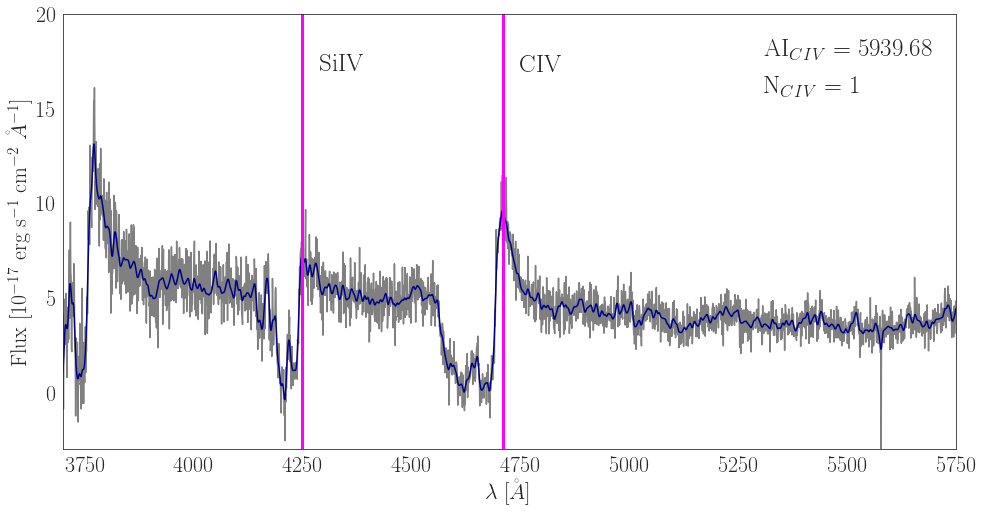

In [12]:
#large N_CIV 46,49,350,651,692
#large AI 619, 726, 760, 227, 364 

for i in [358,46,49,350,651,692, 619, 726, 760, 227, 364]:

    xcoords_civ = [(1.+z_tr_b[i])*l_civ,(1.+z_rr_b[i])*l_civ,(1.+z_rr_m[i])*l_civ]
    xcoords_siv = [(1.+z_tr_b[i])*l_siv,(1.+z_rr_b[i])*l_siv,(1.+z_rr_m[i])*l_siv]
    xcoords_lya = [(1.+z_tr_b[i])*l_lya, (1.+z_rr_b[i])*l_lya,(1.+z_rr_m[i])*l_lya]
    xcoords_nv = [(1.+z_tr_b[i])*l_nv,(1.+z_rr_b[i])*l_nv,(1.+z_rr_m[i])*l_nv]
    xcoords_mgii = [(1.+z_tr_b[i])*l_mgii,(1.+z_rr_b[i])*l_mgii,(1.+z_rr_m[i])*l_mgii]
    print(i,xcoords_civ, xcoords_siv, xcoords_lya, xcoords_nv, xcoords_mgii)        
    print(" ")
"""     
    #print(z_tr_b[i], z_rr_b[i], z_rr_m[i])
    #print((1.+z_tr_b[i])*l_civ,(1.+z_rr_b[i])*l_civ,(1.+z_rr_m[i])*l_civ)

for i in range(896):
    #print(i)
    #print(z_tr_b[i], z_in_b[i], z_rr_b[i], z_rr_m[i])
    #print(i, (1+z_tr_b[i])*l_lya, (1+z_in_b[i])*l_lya, (1+z_rr_b[i])*l_lya, (1+z_rr_m[i])*l_lya)
    print(i, (1.+z_tr_b[i])*l_civ,(1.+z_in_b[i])*l_civ,(1.+z_rr_b[i])*l_civ,(1.+z_rr_m[i])*l_civ)
"""     
#colors = ['cyan', 'yellow','grey','magenta'] 

i = 227

g_xlim = [3700,5750]
g_ylim = [-3,20]

fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(g_xlim)
ax.set_ylim(g_ylim)
ax.tick_params(labelsize=g_fontsize_xyticklabels)
ysmoothed_b = gaussian_filter1d(fluxb_bal[i,:], sigma=3)
ysmoothed_bm = gaussian_filter1d(fluxb_mas[i,:], sigma=2)
plt.plot(waveb_bal,fluxb_bal[i,:],color='grey')
plt.plot(waveb_bal,ysmoothed_b,color='darkblue')
plt.axvline(x=((1.+z_tr_b[i])*l_lya)+590, c='magenta', linewidth = 1) 
plt.axvline(x=((1.+z_rr_m[i])*l_nv)+600, c='black', linewidth = 1) 
plt.axvline(x=((1.+z_rr_m[i])*l_siv)+700, c='black', linewidth = 1)
plt.axvline(x=((1.+z_rr_m[i])*l_civ)+750, c='black', linewidth = 1) 
ax.text(4290, 17, r'SiIV', fontsize=25)
ax.text(4750, 17, r'CIV', fontsize=25)
plt.ylabel(g_ylabel_flux, fontsize=g_fontsize_ylabel)
plt.xlabel(g_xlabel, fontsize=g_fontsize_xlabel)

legend_lines = []
legend_labels = []
legend_lines.append(plt.Line2D((0, 0), (0, 0), color='white', linestyle='-', linewidth=3.0, markeredgecolor='white'))
legend_lines.append(plt.Line2D((0, 0), (0, 0), color='white', linestyle='-', linewidth=3.0, markeredgecolor='white'))
legend_labels.append('AI$_{CIV} =$ 5939.68')
legend_labels.append('N$_{CIV} =$ 1')
ax.legend(legend_lines, legend_labels, loc="best", numpoints=1, ncol=1, fontsize=g_fontsize_legend, handlelength=1.0,frameon=False)

plt.savefig("spectrum_"+str(i)+".pdf")
plt.show()
plt.close(fig)


In [10]:
i = 227
print(z_tr_b[i], z_rr_b[i], z_rr_m[i])

3.3143 3.313144173002839 3.313144173002839


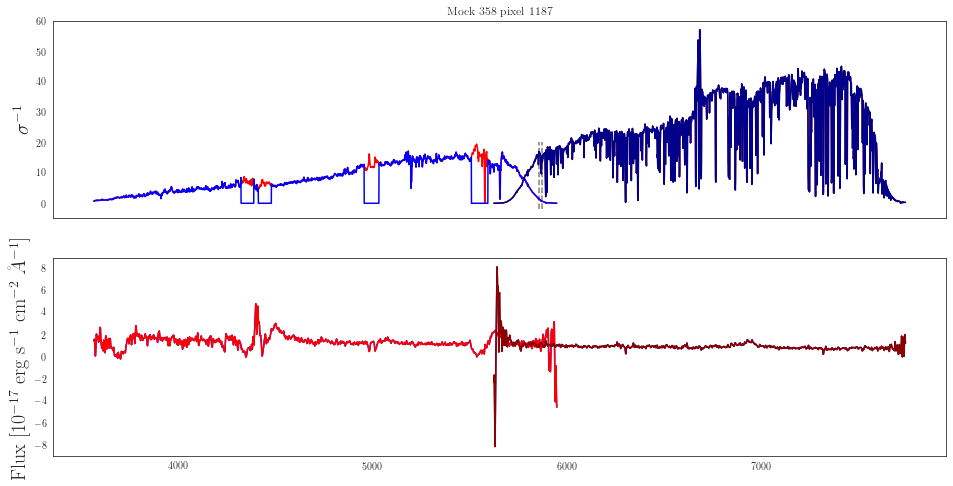

In [95]:
ivar_b1 = fitsio.read(bal_sp,ext=4)
ivar_r1 = fitsio.read(bal_sp,ext=9)
ivar_b2 = fitsio.read(mas_sp,ext=4)
ivar_r2 = fitsio.read(mas_sp,ext=9)

g_ylabel_flux = "Flux [10$^{-17}$ erg s$^{-1}$ cm$^{-2}$ $\AA^{-1}$]"
g_ylabel_ivar = "$\sigma^{-1}$"
g_xlabel = "$\lambda$ [A]"

k = 358

fluxb_bal = fitsio.read(bal_sp,ext=3)
fluxr_bal = fitsio.read(bal_sp,ext=8)
waveb_mas = fitsio.read(mas_sp,ext=2)
waver_mas = fitsio.read(mas_sp,ext=7)
fluxb_mas = fitsio.read(mas_sp,ext=3)
fluxr_mas = fitsio.read(mas_sp,ext=8)

fig, axarr = plt.subplots(2, figsize=(16, 8), sharex=True)
axarr[0].set_title("Mock "+str(k)+" pixel 1187")
axarr[0].plot(waveb_bal, ivar_b1[k,:],color='red')
axarr[0].plot(waver_bal, ivar_r1[k,:],color='darkred')
axarr[0].plot(waveb_mas, ivar_b2[k,:],color='blue')
axarr[0].plot(waver_mas, ivar_r2[k,:],color='darkblue')
axarr[0].vlines(5870, -2, 20, color='grey', linestyles='--')
axarr[0].vlines(5855, -2, 20, color='grey', linestyles='--')
axarr[0].set_ylabel(g_ylabel_ivar, fontsize=g_fontsize_ylabel)
ysmoothed_bbal = gaussian_filter1d(fluxb_bal[k,:], sigma=2)
ysmoothed_rbal = gaussian_filter1d(fluxr_bal[k,:], sigma=2)
ysmoothed_bmas = gaussian_filter1d(fluxb_mas[k,:], sigma=2)
ysmoothed_rmas = gaussian_filter1d(fluxr_mas[k,:], sigma=2)

axarr[1].plot(waveb_bal,ysmoothed_bbal,color='blue')
axarr[1].plot(waver_bal,ysmoothed_rbal,color='darkblue')
axarr[1].plot(waveb_mas,ysmoothed_bmas,color='red')
axarr[1].plot(waver_mas,ysmoothed_rmas,color='darkred')

axarr[1].set_ylabel(g_ylabel_flux, fontsize=g_fontsize_ylabel)
plt.savefig("ivar_flux_indx_"+str(k)+".png")
plt.show(fig)
plt.close(fig)

In [170]:
dz_bal = z_rr_b - z_tr_b
dz_mas = z_rr_m - z_tr_b

ind_bal_max = np.where(dz_bal > 0.05)
ind_bal_min = np.where(dz_bal < - 0.05)
ind_mas_max = np.where(dz_mas > 0.05)
ind_mas_min = np.where(dz_mas < - 0.05)

print(len(dz_bal[ind_bal_min]), len(dz_bal[ind_bal_max]))
print(len(dz_mas[ind_mas_min]), len(dz_mas[ind_mas_max]))

10 1
56 2


In [168]:
for i in range(896):
    if dz_mas[i] > 0.01:
        print(i)

307
436
